<a href="https://colab.research.google.com/github/iskra3138/RL/blob/main/CS234_02_Model_Free_MDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# 1. MC (Monte Carlo) Method

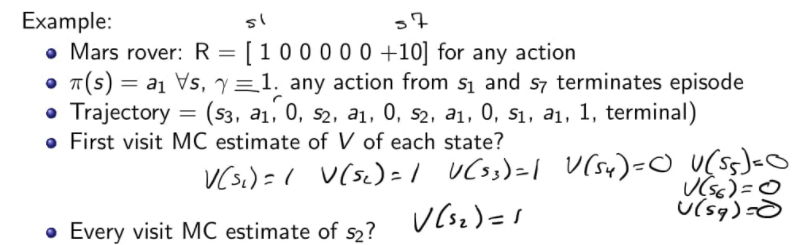

In [2]:
# First Visit
R = np.array([1,0,0,0,0,0,10])
Trajectories = [[3,1,0,2,1,0,2,1,0,1,1,1]]

V = np.zeros_like(R)
N = np.zeros_like(R)
G = np.zeros_like(R)

for Trajectory in Trajectories :
  state_Trajectory = np.array([value-1 for i, value in enumerate(Trajectory) if i%3 == 0 ])
  reward_Trajectory = np.array([value for i, value in enumerate(Trajectory) if i%3 == 2 ])

  episode_N = np.zeros_like(R)
  episode_G = np.zeros_like(reward_Trajectory)
  for t, _ in enumerate(reward_Trajectory) :
    episode_G[t] = np.sum(reward_Trajectory[t:])

  for t, s in enumerate(state_Trajectory):
    if episode_N[s] == 0 :
      episode_N[s] += 1
      N[s] += 1
      G[s] += episode_G[t]
      V[s] = G[s] / N[s]

print (V)

[1 1 1 0 0 0 0]


In [3]:
# Every Visit
R = np.array([1,0,0,0,0,0,10])
Trajectories = [[3,1,0,2,1,0,2,1,0,1,1,1]]

V = np.zeros_like(R)
N = np.zeros_like(R)
G = np.zeros_like(R)

for Trajectory in Trajectories :
  state_Trajectory = np.array([value-1 for i, value in enumerate(Trajectory) if i%3 == 0 ])
  reward_Trajectory = np.array([value for i, value in enumerate(Trajectory) if i%3 == 2 ])

  episode_G = np.zeros_like(reward_Trajectory)
  for t, _ in enumerate(reward_Trajectory) :
    episode_G[t] = np.sum(reward_Trajectory[t:])

  for t, s in enumerate(state_Trajectory):
    N[s] += 1
    G[s] += episode_G[t]
    V[s] = G[s] / N[s]

print (V)

[1 1 1 0 0 0 0]


## Incremental MC

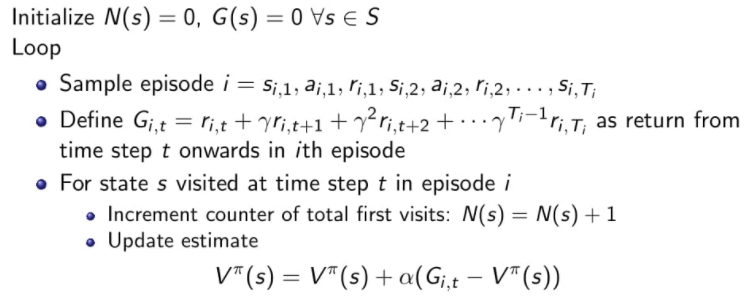

In [4]:
# Incremental MC
R = np.array([1,0,0,0,0,0,10])
Trajectories = [[3,1,0,2,1,0,2,1,0,1,1,1]]

V = np.zeros_like(R)

alpha = 1

for Trajectory in Trajectories :
  state_Trajectory = np.array([value-1 for i, value in enumerate(Trajectory) if i%3 == 0 ])
  reward_Trajectory = np.array([value for i, value in enumerate(Trajectory) if i%3 == 2 ])

  episode_G = np.zeros_like(reward_Trajectory)
  for t, _ in enumerate(reward_Trajectory) :
    episode_G[t] = np.sum(reward_Trajectory[t:])

  for t, s in enumerate(state_Trajectory):
    V[s] = V[s] + alpha*(episode_G[t] - V[s])

print (V)

[1 1 1 0 0 0 0]


## Incremental MC vs. Every Time MC 비교

### Incremental MC

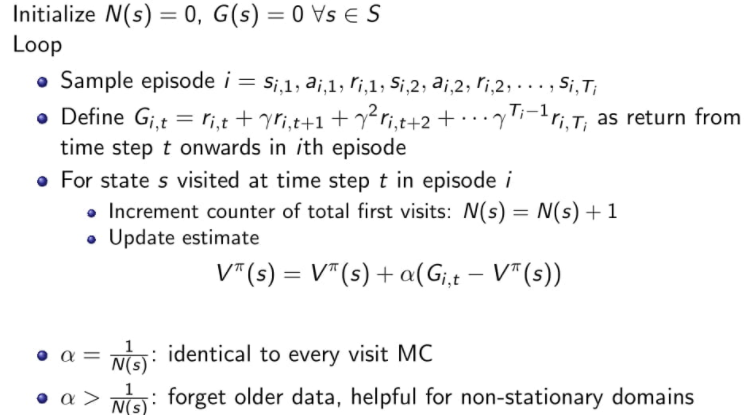

### Every-Visit MC

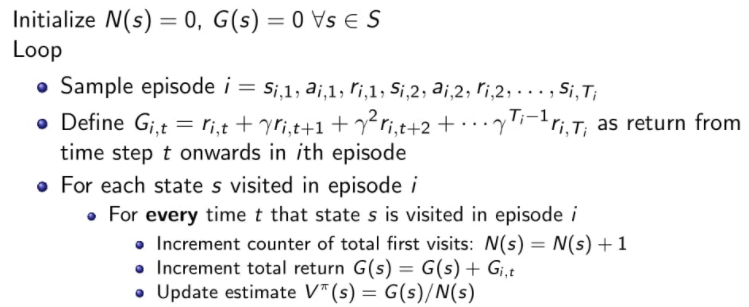

Example

In [5]:
N = 0
G = 0
V = 0
overlap=[3,2,4]
for i in range (3) :
  for j in range(overlap[i]) :
    Git = j+1
    newN = N + 1
    newG = G + Git
    newV = newG/newN
    newV2 = V + (1/newN) * (Git - V)
    print (i, j, newN, newG, newV, newV2)
    N = newN
    G = newG
    V = newV

0 0 1 1 1.0 1.0
0 1 2 3 1.5 1.5
0 2 3 6 2.0 2.0
1 0 4 7 1.75 1.75
1 1 5 9 1.8 1.8
2 0 6 10 1.6666666666666667 1.6666666666666667
2 1 7 12 1.7142857142857142 1.7142857142857144
2 2 8 15 1.875 1.875
2 3 9 19 2.111111111111111 2.111111111111111


# 2. Temporal Difference Method

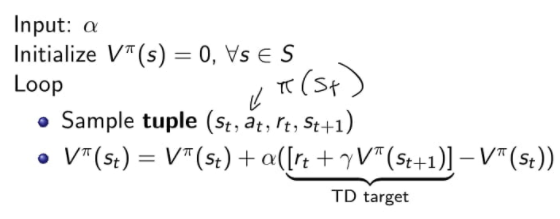

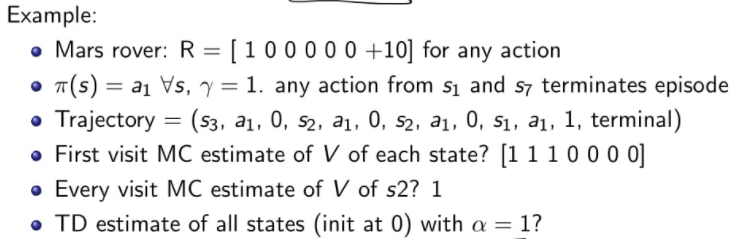

In [11]:
# TD
R = np.array([1,0,0,0,0,0,10])
# terminal State를 8로 표시함
Trajectories = [[3,1,0,2,1,0,2,1,0,1,1,1,8]]

alpha = 1
gamma = 1
# terminal state가 추가되어 State Value Shape을 8로 전달
V = np.zeros((8))

for Trajectory in Trajectories :
  state_Trajectory = np.array([value-1 for i, value in enumerate(Trajectory) if i%3 == 0 ])
  reward_Trajectory = np.array([value for i, value in enumerate(Trajectory) if i%3 == 2 ])

  for i in range(state_Trajectory.shape[0] - 1):
    s = state_Trajectory[i]
    r = reward_Trajectory[i]
    next_s =  state_Trajectory[i+1]
    V[s] = V[s] + alpha*(r + gamma*V[next_s] - V[s])
    #print  (s,r,next_s, V[s])

print (V)

[1. 0. 0. 0. 0. 0. 0. 0.]


In [12]:
# TD
R = np.array([1,0,0,0,0,0,10])

# 샘플이 추가됨에 따른 State Value 변화 관찰하기 
for k in range(10) :
  Trajectory = [3,1,0,2,1,0,2,1,0,1,1,1,8]
  Trajectories = [Trajectory for _ in range(k)]
  alpha = 1
  gamma = 1
  V = np.zeros((8))

  for Trajectory in Trajectories :
    state_Trajectory = np.array([value-1 for i, value in enumerate(Trajectory) if i%3 == 0 ])
    reward_Trajectory = np.array([value for i, value in enumerate(Trajectory) if i%3 == 2 ])

    for i in range(state_Trajectory.shape[0] - 1):
      s = state_Trajectory[i]
      r = reward_Trajectory[i]
      next_s =  state_Trajectory[i+1]
      V[s] = V[s] + alpha*(r + gamma*V[next_s] - V[s])
      #print  (s,r,next_s, V[s])

  print (k, '->', V)

0 -> [0. 0. 0. 0. 0. 0. 0. 0.]
1 -> [1. 0. 0. 0. 0. 0. 0. 0.]
2 -> [1. 1. 0. 0. 0. 0. 0. 0.]
3 -> [1. 1. 1. 0. 0. 0. 0. 0.]
4 -> [1. 1. 1. 0. 0. 0. 0. 0.]
5 -> [1. 1. 1. 0. 0. 0. 0. 0.]
6 -> [1. 1. 1. 0. 0. 0. 0. 0.]
7 -> [1. 1. 1. 0. 0. 0. 0. 0.]
8 -> [1. 1. 1. 0. 0. 0. 0. 0.]
9 -> [1. 1. 1. 0. 0. 0. 0. 0.]


k = 3일 때부터 이전 MC 결과와 같아짐

# Batch MC and TD

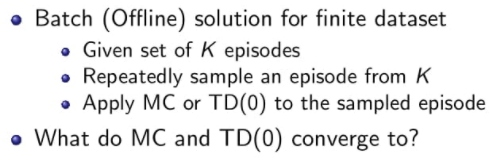

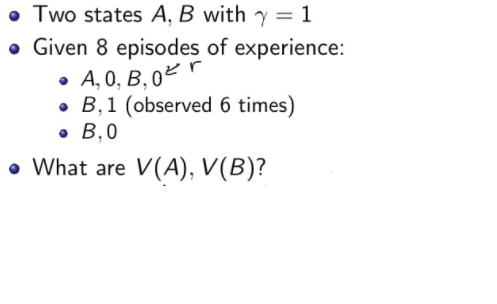

In [8]:
Trajectories = [[0,0,1,0],[1,1],[1,1],[1,1],[1,1],[1,1],[1,1],[1,0]]
gamma = 1

# Every Visit
V = np.zeros((2))
N = np.zeros((2))
G = np.zeros((2))

for Trajectory in Trajectories :
  state_Trajectory = np.array([value for i, value in enumerate(Trajectory) if i%2 == 0 ])
  reward_Trajectory = np.array([value for i, value in enumerate(Trajectory) if i%2 == 1 ])

  episode_G = np.zeros_like(reward_Trajectory)
  for t, reward in enumerate(reward_Trajectory) :
    episode_G[t] = np.sum(reward_Trajectory[t:])

  for i, t in enumerate(state_Trajectory):
    N[t] += 1
    G[t] += episode_G[i]
    V[t] = G[t] / N[t]

print (V)

[0.   0.75]


In [9]:
# TD
alpha = 1

V = np.zeros((3))
Trajectories = [[0,0,1,0,2],[1,1,2],[1,1,2],[1,1,2],[1,1,2],[1,1,2],[1,1,2],[1,0,2]]
gamma = 1

for Trajectory in Trajectories :
  state_Trajectory = np.array([value for i, value in enumerate(Trajectory) if i%2 == 0 ])
  reward_Trajectory = np.array([value for i, value in enumerate(Trajectory) if i%2 == 1 ])

  for i in range(state_Trajectory.shape[0] - 1):
    s = state_Trajectory[i]
    r = reward_Trajectory[i]
    next_s =  state_Trajectory[i+1]
    V[s] = V[s] + alpha*(r + gamma*V[next_s] - V[s])
    #print  (s,r,next_s, V[s])

print (V)

[0. 0. 0.]


In [10]:
# TD 예제 2 : Trajectory 순서 변경
alpha = 1

V = np.zeros((3))
Trajectories = [[0,0,1,0,2],[1,1,2],[1,1,2],[1,1,2],[1,1,2],[1,1,2],[1,0,2],[1,1,2]]
gamma = 1
for _ in range(3) :
  for Trajectory in Trajectories :
    state_Trajectory = np.array([value for i, value in enumerate(Trajectory) if i%2 == 0 ])
    reward_Trajectory = np.array([value for i, value in enumerate(Trajectory) if i%2 == 1 ])
    #print (state_Trajectory, reward_Trajectory)
    for i in range(state_Trajectory.shape[0] - 1):
      s = state_Trajectory[i]
      r = reward_Trajectory[i]
      next_s =  state_Trajectory[i+1]
      V[s] = V[s] + alpha*(r + gamma*V[next_s] - V[s])
      #print  ('DP', s, r, next_s, V[s])

  print (V)

[0. 1. 0.]
[1. 1. 0.]
[1. 1. 0.]
